In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# %matplotlib inline

# import warnings
# warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('AirPassengers.csv', index_col=0)
df.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


In [ ]:
df.shape

(144, 1)

In [ ]:
df.index.min()

'1949-01'

In [ ]:
df.index.max()

'1960-12'

In [ ]:
df.index

Index(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05', '1949-06',
       '1949-07', '1949-08', '1949-09', '1949-10',
       ...
       '1960-03', '1960-04', '1960-05', '1960-06', '1960-07', '1960-08',
       '1960-09', '1960-10', '1960-11', '1960-12'],
      dtype='object', name='Month', length=144)

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [ ]:
df.columns = ['Passengers']
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


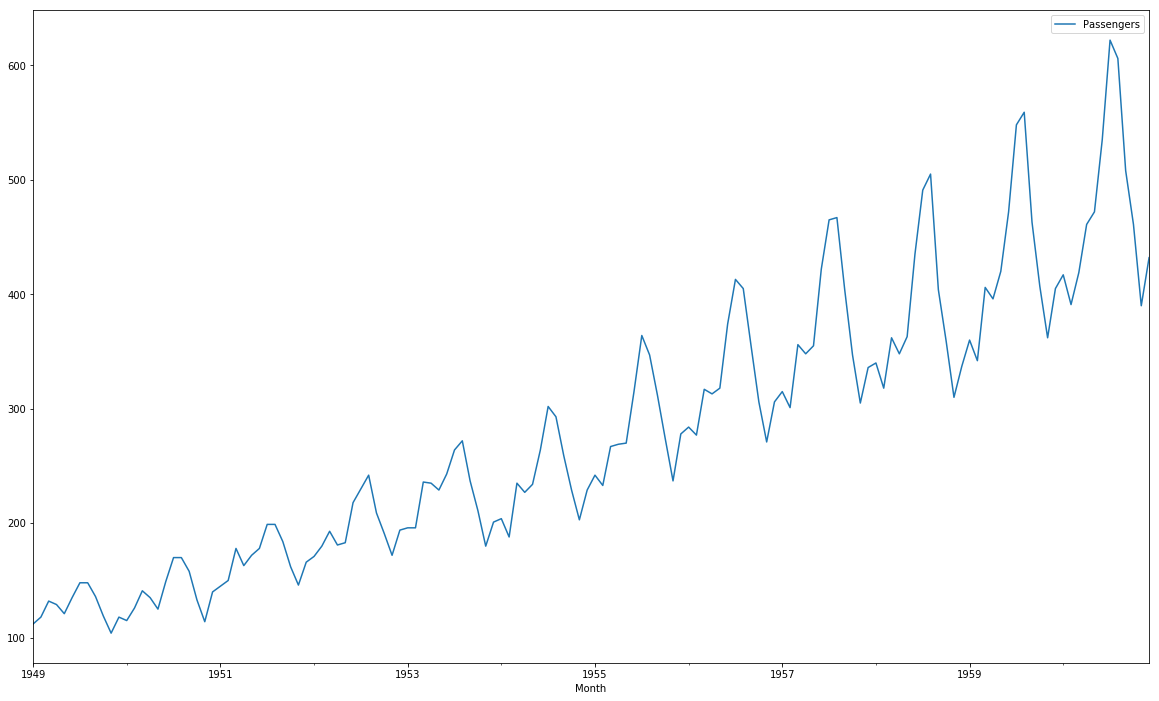

In [ ]:
df.plot(figsize=(20,12))
plt.show()

In [ ]:
import statsmodels.api as sm

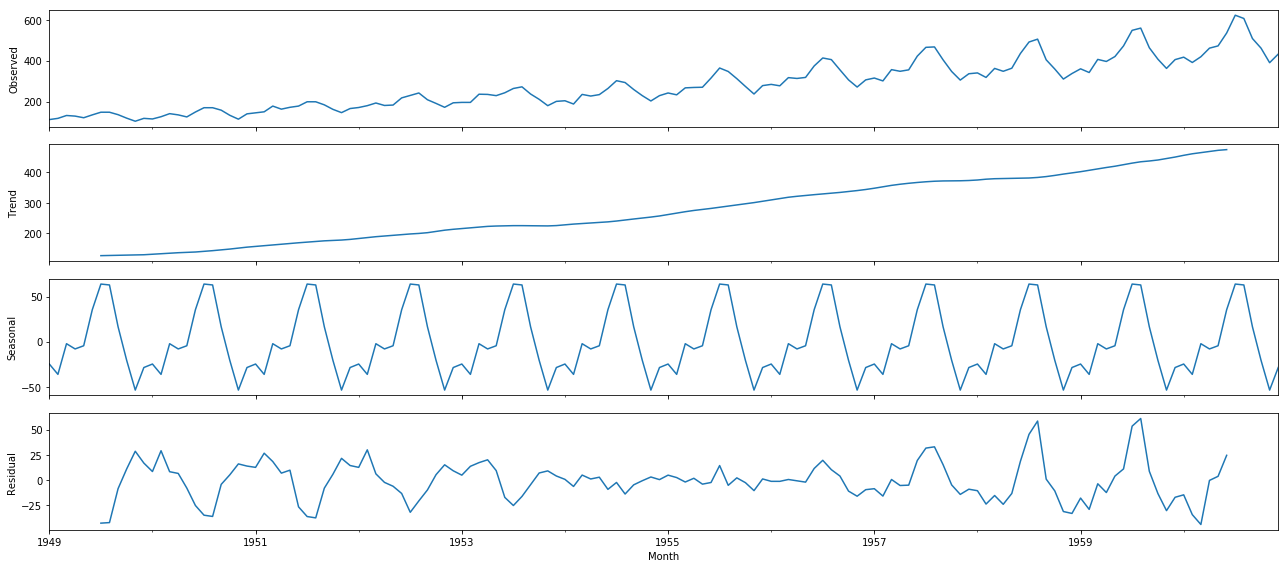

In [ ]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "additive")
fig = decomposition.plot()

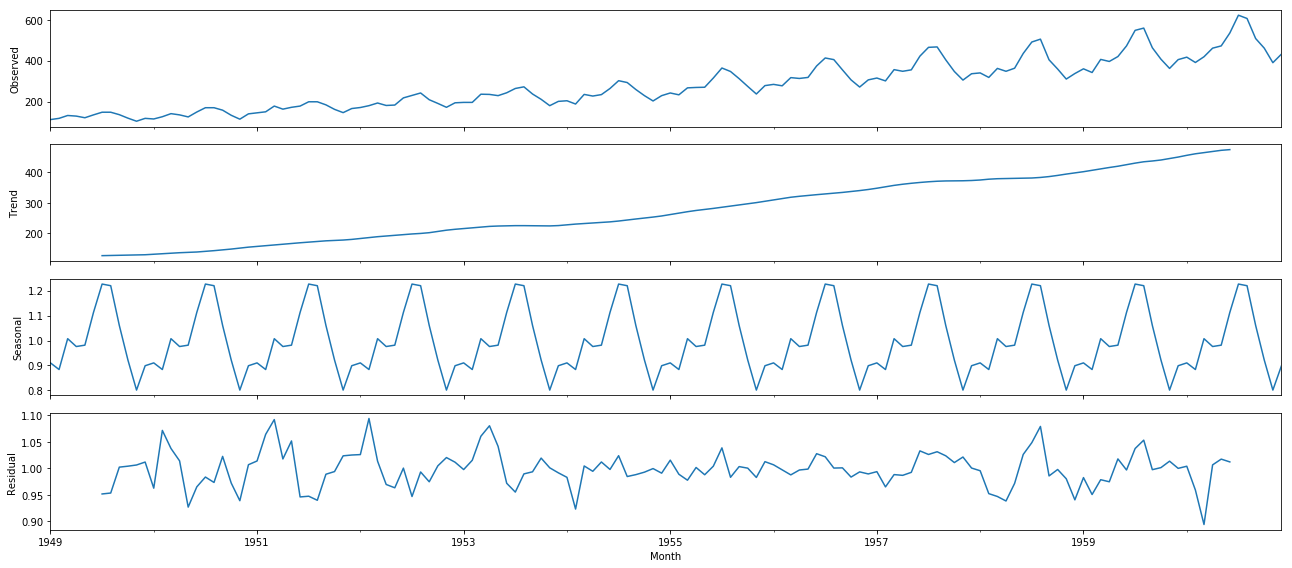

In [ ]:
from matplotlib.pyplot import rcParams
rcParams['figure.figsize'] = 18,8
decomposition = sm.tsa.seasonal_decompose(df, model = "multiplicative")
fig = decomposition.plot()

### Simple Moving Average Model

In [ ]:
df.head(10)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [ ]:
df_1 = df.copy()

In [ ]:
df_1['SMA_12'] = df_1.rolling(window = 2).mean()
df_1.head(20)

,Passengers,SMA_12
Month,,
1949-01-01,112,NaN
1949-02-01,118,115.0
1949-03-01,132,125.0
1949-04-01,129,130.5
1949-05-01,121,125.0
1949-06-01,135,128.0
1949-07-01,148,141.5
1949-08-01,148,148.0
1949-09-01,136,142.0


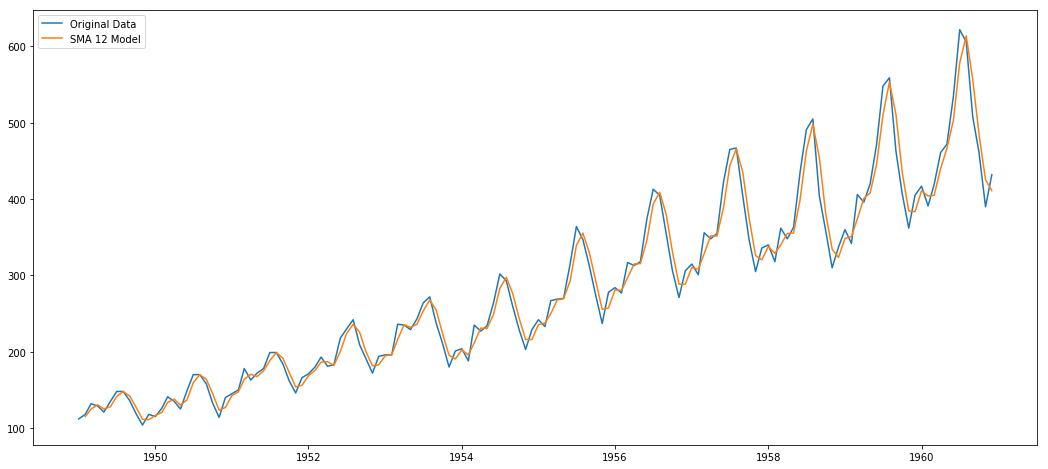

In [ ]:
plt.plot(df_1['Passengers'], label = 'Original Data')
plt.plot(df_1['SMA_12'], label = "SMA 12 Model")
plt.legend()
plt.show()

In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true)) *100

In [ ]:
mape(df_1['Passengers'], df_1['SMA_12'])

4.509723850655714

### ## Stationarity Check using ADF TEST

In [ ]:
data1 = df.iloc[:,0].values

In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(data1)

print("p-value % 0.04f" % adf_test[1])

p-value  0.9919


**p-value is greater than 0.05 so failed to reject NULL hypothesis Faile to reject Null.** <br>
**Conclude that my time series is not stationary**

In [ ]:
df.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
df_2 = df.diff()

df_2.head()

,Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0


In [ ]:
df_2.dropna(inplace=True)

In [ ]:
data2 = df_2.iloc[:,0].values

In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(data2)

print("p-value % 0.04f" % adf_test[1])

p-value  0.0542


**p-value is greater than 0.05 so failed to reject NULL hypothesis Faile to reject Null.** <br>
**Conclude that my time series is not stationary**

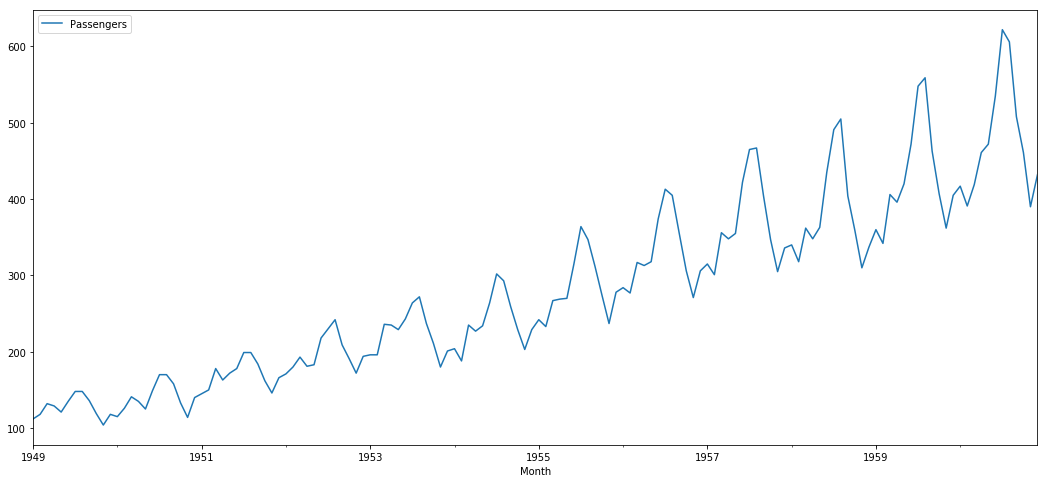

In [ ]:
df.plot()

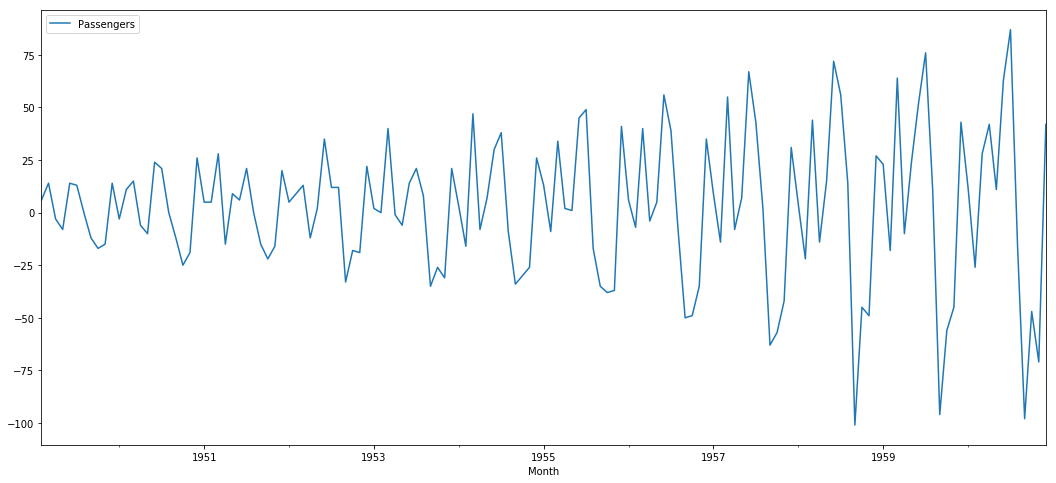

In [ ]:
df_2.plot()

In [ ]:
df_3 = df_2.diff()

df_3.head()

,Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0


In [ ]:
df_3.dropna(inplace=True)

In [ ]:
data3 = df_3.iloc[:,0].values

In [ ]:
import statsmodels.tsa.stattools as ts

adf_test = ts.adfuller(data3)

print("p-value % 0.04f" % adf_test[1])

p-value  0.0000


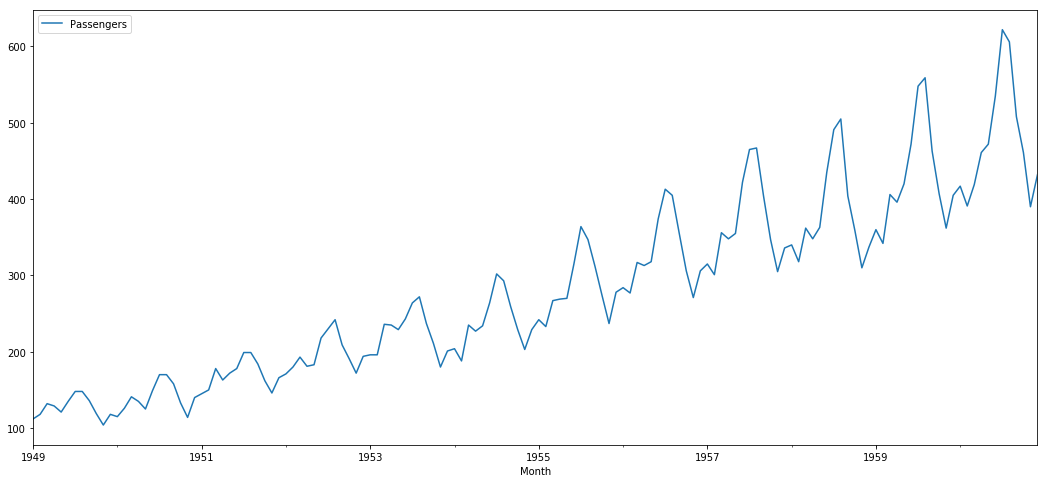

In [ ]:
df.plot()

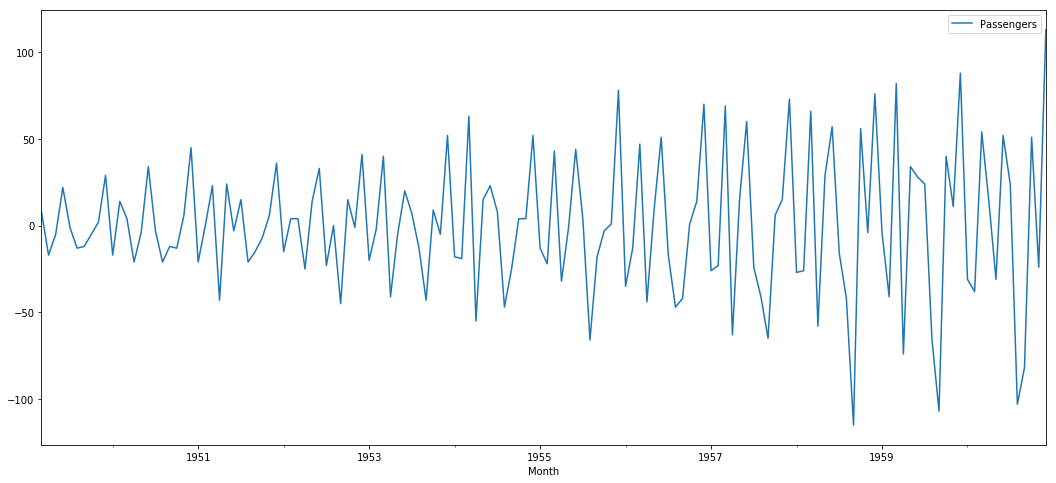

In [ ]:
df_3.plot()